In [19]:
# 2023 Gabriel J. Diaz @ RIT

import os
import sys
import numpy as np
import av
import logging
import pickle
from tqdm import tqdm
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pathlib import Path, PurePath, PurePosixPath

while('retinal_flow_toolkit' in os.path.split(os.getcwd())[0]):
    os.chdir( os.path.split(os.getcwd())[0] )
print(f'cwd: {os.getcwd()}')

import flow_source as fs

logger = logging.getLogger(__name__)
logger.addHandler(logging.StreamHandler(stream=sys.stdout))


cwd: D:\Github\retinal_flow_toolkit


In [2]:
a_file_path = os.path.join("pupil_labs_data", "GD-Short-Driving-Video")

source = fs.pupil_labs_source(a_file_path,recording_number='007')
source.cuda_enabled = True

In [3]:
source.get_median_gaze_for_frame(10)

(0.4830741068033116, 0.5058585758736605)

In [6]:
gd = source.gaze_data
gd.head()

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,eye_center0_3d_z,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z
0,21483.210889,0,0.935452,0.486033,0.500509,21483.216792-0 21483.204987-1,-83.750737,-2.288003,3894.845390,31.822085,...,-0.783828,-0.02990,-0.016061,0.999424,-32.245276,0.691023,0.97438,-0.012976,0.014795,0.999806
1,21483.214837,0,0.966757,0.484696,0.499434,21483.216792-0 21483.212882-1,-123.109446,3.414892,5224.749825,31.822085,...,-0.783828,-0.02990,-0.016061,0.999424,-32.245276,0.691023,0.97438,-0.017121,0.017299,0.999704
2,21483.218859,1,1.000000,0.484963,0.498819,21483.216792-0 21483.220925-1,-113.465830,6.685231,4901.256238,31.822085,...,-0.783828,-0.02990,-0.016061,0.999424,-32.245276,0.691023,0.97438,-0.016291,0.018715,0.999692
3,21483.222849,1,1.000000,0.483191,0.500014,21483.224773-0 21483.220925-1,-89.871071,-0.057743,3472.661421,31.822085,...,-0.783828,-0.03531,-0.018852,0.999199,-32.245276,0.691023,0.97438,-0.016291,0.018715,0.999692
4,21483.226873,1,1.000000,0.482866,0.499090,21483.224773-0 21483.228973-1,-97.069077,3.867874,3679.757068,31.822085,...,-0.783828,-0.03531,-0.018852,0.999199,-32.245276,0.691023,0.97438,-0.017296,0.020855,0.999633


In [23]:
idx_list = np.unique(source.gaze_data.world_index)
med_xy = [source.get_median_gaze_for_frame(idx) for idx in idx_list ]
med_x, med_y = zip(*med_xy)

processed_gaze_data = pd.DataFrame({'median_x': med_x, 'median_y': med_y})
processed_gaze_data.rolling(3).median()

,median_x,median_y
0,NaN,NaN
1,NaN,NaN
2,0.483387,0.500683
3,0.483134,0.502643
4,0.483134,0.504250
...,...,...
556,0.530444,0.456242
557,0.530444,0.452648
558,0.532754,0.448555
559,0.536600,0.448526


In [24]:
import matplotlib.pyplot as plt

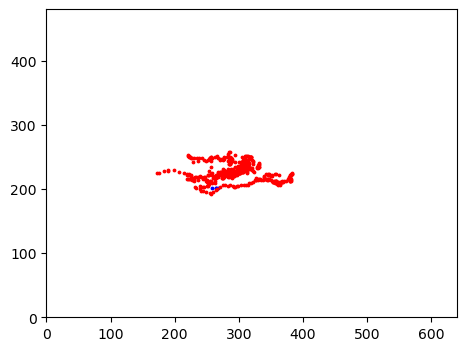

In [38]:
fig, ax = plt.subplots(figsize = (10,4))

w = 640
h = 480

ax.scatter( w * source.gaze_data.norm_pos_x, 1-(h * source.gaze_data.norm_pos_y ),3, c = 'b')
ax.scatter( w * processed_gaze_data.median_x, h * processed_gaze_data.median_y,3, c='r')

ax.set_xlim([0, 640])
ax.set_ylim([0, 480])

ax.set_aspect('equal', 'box')



In [46]:

for d, row in processed_gaze_data.iterrows():
    print(row.median_x)

0.48536448014898115
0.48302845565072144
0.4833872352740377
0.4831343989398073
0.4814069283997596
0.4809785245864155
0.4796585837970843
0.4799213479752427
0.48084286238225765
0.4810530317676909
0.4830741068033116
0.48566839396505457
0.4855806390255043
0.4848268706889367
0.486610890058619
0.4857765126479927
0.4870634105015798
0.4897863983028385
0.4910978644744036
0.4941546589626778
0.4936172772761019
0.4907195677160289
0.4896480516086222
0.4873584595411874
0.485243122985759
0.484065445214963
0.48775045745257284
0.4883521136025668
0.4885134614949599
0.49044301697080916
0.49198829746210015
0.4904219357829064
0.4904894156087808
0.4889478187168647
0.4866571352414545
0.479588581141196
0.4781877268747071
0.4769933750223952
0.4760048212838144
0.4743966706473925
0.4765001894228406
0.4815995946479589
0.48174448692986205
0.48309650173336727
0.4848190560271767
0.4821374118621732
0.4683082156054778
0.45676501158810695
0.4571439958260015
0.45680068139324276
0.4579892383253048
0.4575103225633016
0.454

In [50]:
'aaa' in ['aaa','bbb','cccc']

True